In [1]:
# Librerias

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Conexión a la base de datos

In [2]:
import sqlite3

# Crea un objeto de conexión a la base de datos SQLite
#con = sqlite3.connect("data/portal_mammals.sqlite")

con = sqlite3.connect("../NeuralWorks_Data_Analyst/database.sqlite")

# Con la conexión, crea un objeto cursor
cur = con.cursor()

# El resultado de "cursor.execute" puede ser iterado por fila
for row in cur.execute('SELECT * FROM Country;'):
    print(row)

# No te olvides de cerrar la conexión
con.close()

(1, 'Belgium')
(1729, 'England')
(4769, 'France')
(7809, 'Germany')
(10257, 'Italy')
(13274, 'Netherlands')
(15722, 'Poland')
(17642, 'Portugal')
(19694, 'Scotland')
(21518, 'Spain')
(24558, 'Switzerland')


In [3]:
# Importa pandas y sqlite3
import pandas as pd
# Importa el módulo sqlite3
import sqlite3

# Crea una conexión a la base de datos SQLite
con = sqlite3.connect("../NeuralWorks_Data_Analyst/database.sqlite")
# Usa read_sql_query de pandas para extraer el resultado
# de la consulta a un DataFrame
df_match = pd.read_sql_query("SELECT * FROM Match", con)
df_league = pd.read_sql_query("SELECT * FROM League", con)
df_country = pd.read_sql_query("SELECT * FROM Country", con)
df_team = pd.read_sql_query("SELECT * FROM Team", con)
df_atributos = pd.read_sql_query("SELECT * FROM Team_Attributes", con)
df_player = pd.read_sql_query("SELECT * FROM Player", con)
df_player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", con)

df_partidos = pd.read_sql_query("""SELECT c.id, c.name as liga, l.name as nombre_liga, t.team_long_name, m.season, m.date, m.match_api_id, m.home_team_api_id, m.away_team_api_id, m.home_team_goal, m.away_team_goal 
                                FROM Country c
                                JOIN League l
                                ON c.id = l.id
                                JOIN Match m
                                ON c.id = m.country_id
                                JOIN Team t
                                ON m.home_team_api_id = t.team_api_id;""", con)

# Verifica que el resultado de la consulta SQL está
# almacenado en el DataFrame
#print(df.head())

# cerrar la conexión
con.close()

In [4]:
df_match.shape

(25979, 115)

In [5]:
df_league.shape

(11, 3)

In [6]:
df_country.shape

(11, 2)

In [7]:
df_team.shape

(299, 5)

In [8]:
df_match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [9]:
df_country.columns

Index(['id', 'name'], dtype='object')

In [10]:
df_league.columns

Index(['id', 'country_id', 'name'], dtype='object')

In [11]:
df_team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [12]:
len(df_match['home_team_api_id'].value_counts())

299

In [13]:
len(df_team['team_api_id'].value_counts())

299

In [14]:
df = None
df = df_team.copy()
df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [15]:
df_team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [16]:
df_partidos.head(2)

,id,liga,nombre_liga,team_long_name,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,KRC Genk,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0


In [17]:
df_partidos['liga'].value_counts()

England        3040
France         3040
Spain          3040
Italy          3017
Germany        2448
Netherlands    2448
Portugal       2052
Poland         1920
Scotland       1824
Belgium        1728
Switzerland    1422
Name: liga, dtype: int64

### Creación de variables resultado del partido (L-E-V) , cantidad de goles

In [18]:
#df_partidos[(df_partidos['home_team_goal'] - df_partidos['away_team_goal']) > 0]

# defining function resultados de los partidos
def fun(num):
  
    if num > 0:
        return "L"
  
    elif num < 0 :
        return "V"
  
    else:
        return "E"
  

In [19]:
num = (df_partidos['home_team_goal'] - df_partidos['away_team_goal'])
df_partidos['resultado'] = num.apply(fun)

In [20]:
df_partidos['total_goles'] = df_partidos['home_team_goal'] + df_partidos['away_team_goal']
df_partidos.head()

,id,liga,nombre_liga,team_long_name,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,resultado,total_goles
0,1,Belgium,Belgium Jupiler League,KRC Genk,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,E,2
1,1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,E,0
2,1,Belgium,Belgium Jupiler League,KSV Cercle Brugge,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,V,3
3,1,Belgium,Belgium Jupiler League,KAA Gent,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,L,5
4,1,Belgium,Belgium Jupiler League,FCV Dender EH,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,V,4


### Promedio de goles en cada uno de los paises

In [110]:
df_partidos.groupby(['liga', 'resultado'])['total_goles'].mean()

liga         resultado
Belgium      E            2.080000
             L            3.083951
             V            2.959432
England      E            2.028097
             L            2.969065
             V            2.912341
France       E            1.785797
             L            2.689478
             V            2.722628
Germany      E            2.154104
             L            3.188799
             V            3.073925
Italy        E            2.002513
             L            2.896944
             V            2.733415
Netherlands  E            2.330465
             L            3.343296
             V            3.265805
Poland       E            1.763810
             L            2.698851
             V            2.632381
Portugal     E            1.812383
             L            2.740088
             V            2.859247
Scotland     E            1.991051
             L            2.898684
             V            2.773096
Spain        E            1.8948

### Cantidad de goles en cada uno de los paises

In [22]:
#df_partidos.groupby(['liga'])['total_goles'].sum()

df_partidos.groupby(['liga'])['total_goles'].sum()

liga
Belgium        4841
England        8240
France         7427
Germany        7103
Italy          7895
Netherlands    7542
Poland         4656
Portugal       5201
Scotland       4804
Spain          8412
Switzerland    4166
Name: total_goles, dtype: int64

In [23]:
df_partidos.groupby(['liga'])['team_long_name'].unique()

liga
Belgium        [KRC Genk, SV Zulte-Waregem, KSV Cercle Brugge...
England        [Manchester United, Arsenal, Sunderland, West ...
France         [AJ Auxerre, Girondins de Bordeaux, Le Havre A...
Germany        [FC Bayern Munich, Bayer 04 Leverkusen, FC Sch...
Italy          [Atalanta, Cagliari, Catania, Chievo Verona, F...
Netherlands    [Vitesse, Roda JC Kerkrade, Willem II, N.E.C.,...
Poland         [Wisła Kraków, Polonia Bytom, Legia Warszawa, ...
Portugal       [FC Porto, Sporting CP, Vitória Guimarães, FC ...
Scotland       [Falkirk, Heart of Midlothian, Kilmarnock, Abe...
Spain          [Valencia CF, CA Osasuna, RC Deportivo de La C...
Switzerland    [Grasshopper Club Zürich, BSC Young Boys, FC A...
Name: team_long_name, dtype: object

In [24]:
df_partidos.isnull().sum(axis = 0)

id                  0
liga                0
nombre_liga         0
team_long_name      0
season              0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
resultado           0
total_goles         0
dtype: int64

In [25]:
df_partidos['season'].value_counts()

2008/2009    3326
2015/2016    3326
2014/2015    3325
2010/2011    3260
2012/2013    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

In [26]:
len(df_partidos[df_partidos['liga'] == 'Spain']['team_long_name'].unique())

33

In [27]:
df_partidos.head(2)

,id,liga,nombre_liga,team_long_name,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,resultado,total_goles
0,1,Belgium,Belgium Jupiler League,KRC Genk,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,E,2
1,1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,E,0


In [28]:
df_partidos['resultado'].value_counts()

L    11917
V     7466
E     6596
Name: resultado, dtype: int64

In [126]:
df_partidos['liga'].value_counts()

England        3040
France         3040
Spain          3040
Italy          3017
Germany        2448
Netherlands    2448
Portugal       2052
Poland         1920
Scotland       1824
Belgium        1728
Switzerland    1422
Name: liga, dtype: int64

In [29]:
df_partidos.groupby(['liga','resultado'])['resultado'].count()

liga         resultado
Belgium      E             425
             L             810
             V             493
England      E             783
             L            1390
             V             867
France       E             859
             L            1359
             V             822
Germany      E             597
             L            1107
             V             744
Italy        E             796
             L            1407
             V             814
Netherlands  E             581
             L            1171
             V             696
Poland       E             525
             L             870
             V             525
Portugal     E             533
             L             908
             V             611
Scotland     E             447
             L             760
             V             617
Spain        E             704
             L            1485
             V             851
Switzerland  E             346
             L  

In [127]:
##################
con = sqlite3.connect("../NeuralWorks_Data_Analyst/database.sqlite")
informacion_por_temporada = pd.read_sql("""SELECT Country.name AS pais, 
                                        
                                        
                                        
                                        count(distinct HT.team_long_name) AS numero_equipos,
                                        avg(home_team_goal) AS prom_goles_local, 
                                        avg(away_team_goal) AS prom_goles_visita, 
                                        avg(home_team_goal-away_team_goal) AS dif_prom_goles, 
                                        avg(home_team_goal+away_team_goal) AS promedio_goles, 
                                        sum(home_team_goal+away_team_goal) AS total_goles                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE pais in ('Spain', 'Germany', 'France', 'Italy', 'England', 'Netherlands', 'Portugal', 'Poland', 'Scotland', 'Belgium', 'Switzerland')
                                GROUP BY Country.name, League.name
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", con)

con.close()

In [129]:
informacion_por_temporada.sort_values(by=['promedio_goles'], ascending=False)

,pais,numero_equipos,prom_goles_local,prom_goles_visita,dif_prom_goles,promedio_goles,total_goles
5,Netherlands,25,1.779820,1.301062,0.478758,3.080882,7542
10,Switzerland,15,1.663150,1.266526,0.396624,2.929677,4166
3,Germany,30,1.626634,1.274918,0.351716,2.901552,7103
0,Belgium,24,1.609375,1.192130,0.417245,2.801505,4841
9,Spain,33,1.631250,1.135855,0.495395,2.767105,8412
1,England,34,1.550987,1.159539,0.391447,2.710526,8240
8,Scotland,17,1.429276,1.204496,0.224781,2.633772,4804
4,Italy,32,1.500829,1.116009,0.384819,2.616838,7895
7,Portugal,29,1.408382,1.126218,0.282164,2.534600,5201
2,France,35,1.402961,1.040132,0.362829,2.443092,7427


### Jugadores

In [32]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [33]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [34]:
df_jugadores = df_player.merge(df_player_attributes, left_on='player_api_id', right_on='player_api_id')
df_jugadores.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [35]:
print("Dimension data de atributos de jugadores: ", df_jugadores.shape)

Dimension data de atributos de jugadores:  (183978, 48)


In [36]:
df_jugadores.columns

Index(['id_x', 'player_api_id', 'player_name', 'player_fifa_api_id_x',
       'birthday', 'height', 'weight', 'id_y', 'player_fifa_api_id_y', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [37]:
df_copia_jugadores = None
df_copia_jugadores = df_jugadores.drop(['id_x', 'id_y'], axis=1)
df_copia_jugadores.head(1)

,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,player_fifa_api_id_y,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [38]:
df_copia_jugadores[['year','month','day_time']]=df_copia_jugadores['date'].str.split('-',expand=True)
df_copia_jugadores.head(2)

,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,player_fifa_api_id_y,date,overall_rating,potential,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2016-02-18 00:00:00,67.0,71.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,02,18 00:00:00
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2015-11-19 00:00:00,67.0,71.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19 00:00:00


In [39]:
#df_jugadores.describe(include='all')
df_copia_jugadores.describe()

,player_api_id,player_fifa_api_id_x,height,weight,player_fifa_api_id_y,overall_rating,potential,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,135900.617324,165636.285936,181.878872,168.776245,165671.524291,68.600015,73.460353,55.086883,49.921078,57.266023,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,136927.840510,53856.899802,6.394818,15.088920,53851.094769,7.041139,6.592271,17.242135,19.038705,16.488905,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2625.000000,2.000000,157.480000,117.000000,2.000000,33.000000,39.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34763.000000,155681.000000,177.800000,159.000000,155798.000000,64.000000,69.000000,45.000000,34.000000,49.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,77741.000000,183471.000000,182.880000,168.000000,183488.000000,69.000000,74.000000,59.000000,53.000000,60.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,191080.000000,199843.750000,185.420000,179.000000,199848.000000,73.000000,78.000000,68.000000,65.000000,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,750584.000000,234141.000000,208.280000,243.000000,234141.000000,94.000000,97.000000,95.000000,97.000000,98.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [40]:
df_copia_jugadores.drop(['player_api_id','player_fifa_api_id_x', 'player_fifa_api_id_y'], axis=1 , inplace=True)

In [41]:
df_copia_jugadores.head()

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,02,18 00:00:00
1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19 00:00:00
2,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,09,21 00:00:00
3,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,03,20 00:00:00
4,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,02,22 00:00:00


In [42]:
df_copia_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_name          183978 non-null  object 
 1   birthday             183978 non-null  object 
 2   height               183978 non-null  float64
 3   weight               183978 non-null  int64  
 4   date                 183978 non-null  object 
 5   overall_rating       183142 non-null  float64
 6   potential            183142 non-null  float64
 7   preferred_foot       183142 non-null  object 
 8   attacking_work_rate  180748 non-null  object 
 9   defensive_work_rate  183142 non-null  object 
 10  crossing             183142 non-null  float64
 11  finishing            183142 non-null  float64
 12  heading_accuracy     183142 non-null  float64
 13  short_passing        183142 non-null  float64
 14  volleys              181265 non-null  float64
 15  dribbling        

In [43]:
df_final = df_copia_jugadores[df_copia_jugadores['year'] == '2016']
df_final=df_final.drop_duplicates(subset ="player_name") 
df_final = df_final.dropna()
df_final.head()

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,02,18 00:00:00
5,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2016-04-21 00:00:00,74.0,76.0,left,high,medium,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2016,04,21 00:00:00
38,Aaron Doran,1991-05-13 00:00:00,170.18,163,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,...,22.0,24.0,16.0,11.0,12.0,9.0,13.0,2016,01,07 00:00:00
64,Aaron Galindo,1982-05-08 00:00:00,182.88,198,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,...,71.0,68.0,15.0,12.0,13.0,12.0,11.0,2016,04,21 00:00:00
112,Aaron Hunt,1986-09-04 00:00:00,182.88,161,2016-04-28 00:00:00,77.0,77.0,left,medium,medium,...,34.0,35.0,15.0,12.0,7.0,16.0,15.0,2016,04,28 00:00:00


In [44]:
df_final.isna().sum()

player_name            0
birthday               0
height                 0
weight                 0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0


In [45]:
df_final.shape

(5538, 46)

In [46]:
var_numericas = df_final.select_dtypes(include = ["number"])
var_numericas
#seleccion.iloc[:, 3:].head()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,182.88,187,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,170.18,146,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,170.18,163,65.0,67.0,64.0,58.0,60.0,66.0,52.0,66.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,182.88,198,69.0,69.0,57.0,21.0,68.0,65.0,48.0,56.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
112,182.88,161,77.0,77.0,77.0,72.0,64.0,79.0,77.0,78.0,...,76.0,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183750,172.72,152,78.0,78.0,86.0,66.0,58.0,79.0,74.0,78.0,...,76.0,70.0,69.0,70.0,65.0,15.0,9.0,11.0,15.0,8.0
183822,175.26,148,73.0,74.0,69.0,71.0,45.0,73.0,72.0,76.0,...,73.0,65.0,26.0,31.0,32.0,6.0,6.0,9.0,16.0,7.0
183872,170.18,157,79.0,79.0,70.0,77.0,52.0,78.0,69.0,82.0,...,75.0,67.0,33.0,45.0,36.0,7.0,13.0,15.0,8.0,13.0
183895,180.34,159,64.0,64.0,65.0,60.0,42.0,68.0,34.0,75.0,...,35.0,76.0,39.0,26.0,24.0,16.0,10.0,12.0,8.0,8.0


### Correlación

In [47]:
# Matriz de correlación
# ==============================================================================
corr_matrix = var_numericas.corr(method='spearman')
corr_matrix

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
height,1.000000,0.761990,0.007114,-0.032365,-0.482706,-0.301960,0.341096,-0.334568,-0.319918,-0.499147,...,-0.392497,-0.279624,0.047963,0.050998,0.008223,0.134758,0.131598,0.120551,0.142430,0.140750
weight,0.761990,1.000000,0.060556,-0.046314,-0.401533,-0.227343,0.315886,-0.293110,-0.230128,-0.422513,...,-0.330133,-0.188765,0.020293,0.026463,-0.012162,0.131320,0.124702,0.120775,0.130723,0.116160
overall_rating,0.007114,0.060556,1.000000,0.797557,0.382421,0.289654,0.319898,0.563450,0.338952,0.432415,...,0.439903,0.301870,0.187526,0.244096,0.207536,-0.036022,-0.028606,-0.031756,-0.047678,-0.043010
potential,-0.032365,-0.046314,0.797557,1.000000,0.288272,0.264403,0.192282,0.482220,0.265408,0.443108,...,0.365826,0.216158,0.107348,0.157293,0.134087,-0.043176,-0.040838,-0.053704,-0.058919,-0.056338
crossing,-0.482706,-0.401533,0.382421,0.288272,1.000000,0.472108,0.015562,0.690621,0.548501,0.730164,...,0.648326,0.483108,0.181193,0.202494,0.229173,-0.210428,-0.200913,-0.201407,-0.220944,-0.226980
finishing,-0.301960,-0.227343,0.289654,0.264403,0.472108,1.000000,0.188586,0.484726,0.856890,0.748538,...,0.648444,0.793089,-0.351153,-0.310375,-0.331705,-0.206206,-0.180720,-0.209895,-0.225489,-0.216492
heading_accuracy,0.341096,0.315886,0.319898,0.192282,0.015562,0.188586,1.000000,0.174331,0.193398,0.008325,...,0.006945,0.232812,0.423654,0.435448,0.397380,-0.220820,-0.218108,-0.219925,-0.215330,-0.211505
short_passing,-0.334568,-0.293110,0.563450,0.482220,0.690621,0.484726,0.174331,1.000000,0.549748,0.690464,...,0.796342,0.505640,0.260071,0.325525,0.293637,-0.225700,-0.207413,-0.216076,-0.224186,-0.215145
volleys,-0.319918,-0.230128,0.338952,0.265408,0.548501,0.856890,0.193398,0.549748,1.000000,0.740098,...,0.681851,0.774867,-0.240599,-0.194057,-0.208552,-0.214814,-0.202464,-0.220497,-0.233241,-0.219960
dribbling,-0.499147,-0.422513,0.432415,0.443108,0.730164,0.748538,0.008325,0.690464,0.740098,1.000000,...,0.752730,0.641546,-0.130847,-0.085798,-0.083786,-0.234565,-0.207530,-0.211265,-0.233448,-0.226543


In [48]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)
#tidy_corr_matrix(corr_matrix).head()

,variable_1,variable_2,r,abs_r
1141,standing_tackle,sliding_tackle,0.960778,0.960778
1177,sliding_tackle,standing_tackle,0.960778,0.960778
1103,marking,standing_tackle,0.953233,0.953233
1139,standing_tackle,marking,0.953233,0.953233
1104,marking,sliding_tackle,0.951234,0.951234
1176,sliding_tackle,marking,0.951234,0.951234
955,interceptions,standing_tackle,0.927361,0.927361
1135,standing_tackle,interceptions,0.927361,0.927361
569,sprint_speed,acceleration,0.909452,0.909452
533,acceleration,sprint_speed,0.909452,0.909452


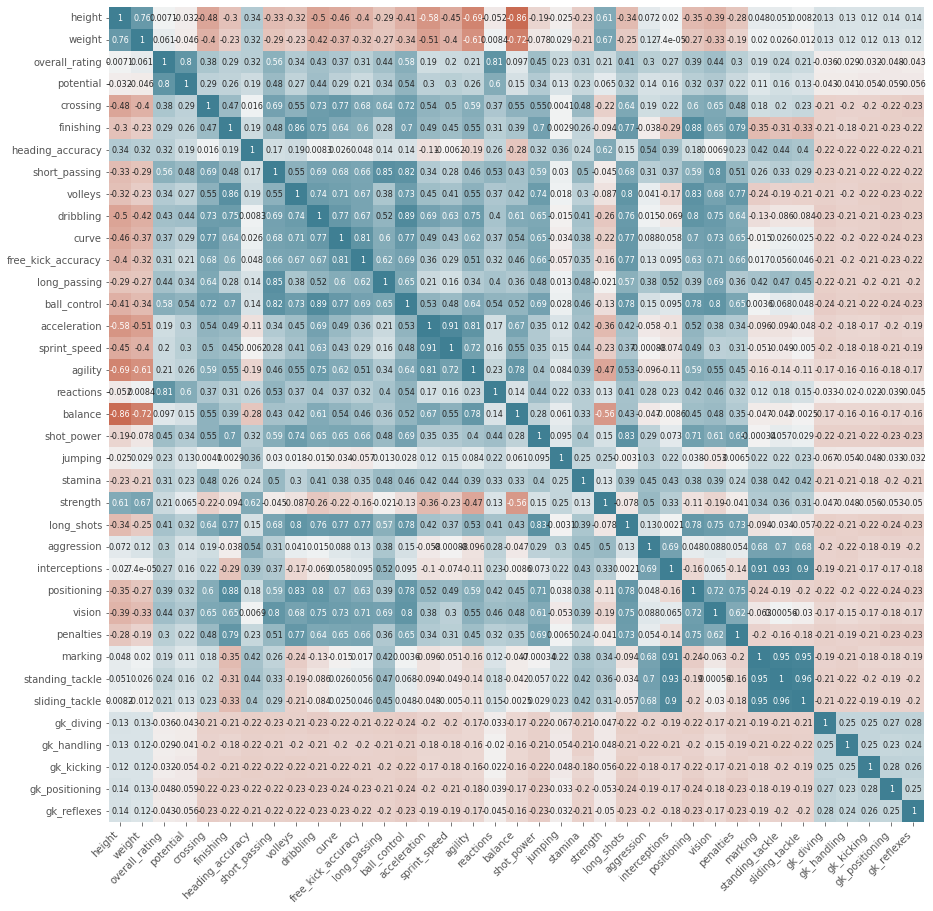

In [49]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [50]:
!pip install pingouin

In [51]:
import pingouin as pg

pcorr_matrix = var_numericas.pcorr().round(3)
pcorr_matrix

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
height,1.000,0.288,-0.080,0.122,-0.041,0.011,0.157,0.009,0.019,-0.005,...,0.019,-0.048,-0.009,-0.001,-0.005,0.010,0.006,-0.014,0.027,0.022
weight,0.288,1.000,0.059,-0.052,0.014,-0.026,-0.013,-0.029,0.030,0.020,...,0.016,0.007,-0.026,-0.006,0.016,0.015,-0.008,-0.001,0.020,-0.015
overall_rating,-0.080,0.059,1.000,0.614,0.091,0.027,0.180,0.031,0.027,-0.073,...,-0.017,0.035,0.045,-0.014,-0.042,0.059,0.069,0.028,0.064,0.071
potential,0.122,-0.052,0.614,1.000,-0.177,0.016,-0.020,0.077,-0.039,0.107,...,0.013,-0.021,-0.029,0.040,0.050,0.023,0.003,-0.008,-0.014,-0.007
crossing,-0.041,0.014,0.091,-0.177,1.000,-0.078,-0.028,0.060,0.006,0.184,...,-0.009,-0.012,0.077,-0.054,0.081,0.028,0.017,-0.004,0.009,-0.027
finishing,0.011,-0.026,0.027,0.016,-0.078,1.000,0.068,0.023,0.257,0.080,...,0.074,0.188,-0.007,-0.020,-0.080,-0.011,0.013,-0.015,-0.009,-0.031
heading_accuracy,0.157,-0.013,0.180,-0.020,-0.028,0.068,1.000,0.023,0.078,-0.064,...,-0.086,0.130,0.082,-0.030,-0.000,-0.089,-0.086,-0.049,-0.088,-0.086
short_passing,0.009,-0.029,0.031,0.077,0.060,0.023,0.023,1.000,-0.010,-0.004,...,0.172,0.002,-0.001,0.030,-0.014,-0.021,-0.023,-0.019,-0.030,-0.016
volleys,0.019,0.030,0.027,-0.039,0.006,0.257,0.078,-0.010,1.000,0.029,...,0.060,0.098,-0.053,-0.021,0.032,-0.005,-0.022,-0.003,-0.006,0.015
dribbling,-0.005,0.020,-0.073,0.107,0.184,0.080,-0.064,-0.004,0.029,1.000,...,0.070,-0.037,-0.020,-0.002,0.023,-0.022,-0.022,-0.019,-0.008,0.002


In [52]:
correlaciones_parciales = pg.pairwise_corr(var_numericas, columns=var_numericas.columns, method='spearman')
correlaciones_parciales.sort_values("r", ascending=False).head(30)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
645,standing_tackle,sliding_tackle,spearman,two-sided,5538,0.960778,"[0.96, 0.96]",0.0,1.0
638,marking,standing_tackle,spearman,two-sided,5538,0.953233,"[0.95, 0.96]",0.0,1.0
639,marking,sliding_tackle,spearman,two-sided,5538,0.951234,"[0.95, 0.95]",0.0,1.0
604,interceptions,standing_tackle,spearman,two-sided,5538,0.927361,"[0.92, 0.93]",0.0,1.0
413,acceleration,sprint_speed,spearman,two-sided,5538,0.909452,"[0.9, 0.91]",0.0,1.0
603,interceptions,marking,spearman,two-sided,5538,0.905643,"[0.9, 0.91]",0.0,1.0
605,interceptions,sliding_tackle,spearman,two-sided,5538,0.904433,"[0.9, 0.91]",0.0,1.0
291,dribbling,ball_control,spearman,two-sided,5538,0.891659,"[0.89, 0.9]",0.0,1.0
190,finishing,positioning,spearman,two-sided,5538,0.877673,"[0.87, 0.88]",0.0,1.0
172,finishing,volleys,spearman,two-sided,5538,0.856890,"[0.85, 0.86]",0.0,1.0


In [53]:
len(var_numericas.columns)

37

In [54]:
var_numericas.columns

Index(['height', 'weight', 'overall_rating', 'potential', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [55]:
#correlaciones_parciales['X'].value_counts()
#correlaciones_parciales['Y'].value_counts()

In [56]:
#borrar = []

In [57]:
borrar = ['standing_tackle',
'sliding_tackle',
'acceleration',
'ball_control',
'volleys',
'interceptions',
'shot_power',
'short_passing',
'overall_rating',
'positioning',
'curve',
'height',
#'weight',
'long_shots','penalties', 'balance','dribbling', 'vision',]
        
          
# 'gk_diving', 'gk_handling',
# 'gk_kicking', 'gk_positioning', 'gk_reflexes', 
# 'potential', 'heading_accuracy','jumping']

In [58]:
extra = var_numericas.drop(borrar, axis= 1)
extra.columns

Index(['weight', 'potential', 'crossing', 'finishing', 'heading_accuracy',
       'free_kick_accuracy', 'long_passing', 'sprint_speed', 'agility',
       'reactions', 'jumping', 'stamina', 'strength', 'aggression', 'marking',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [59]:
pg.pairwise_corr(extra, columns=extra.columns, method='spearman').sort_values("r", ascending=False).head(10)
#correlaciones_parciales.sort_values("r", ascending=False).head(30)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
112,sprint_speed,agility,spearman,two-sided,5538,0.715684,"[0.7, 0.73]",0.0,1.0
169,aggression,marking,spearman,two-sided,5538,0.679995,"[0.67, 0.69]",0.0,1.0
39,crossing,free_kick_accuracy,spearman,two-sided,5538,0.678349,"[0.66, 0.69]",0.0,1.0
11,weight,strength,spearman,two-sided,5538,0.666652,"[0.65, 0.68]",0.0,1.0
40,crossing,long_passing,spearman,two-sided,5538,0.641689,"[0.63, 0.66]",0.0,1.0
85,free_kick_accuracy,long_passing,spearman,two-sided,5538,0.617865,"[0.6, 0.63]",0.0,1.0
77,heading_accuracy,strength,spearman,two-sided,5538,0.617841,"[0.6, 0.63]",0.0,1.0
55,finishing,free_kick_accuracy,spearman,two-sided,5538,0.597033,"[0.58, 0.61]",0.0,1.0
26,potential,reactions,spearman,two-sided,5538,0.596117,"[0.58, 0.61]",0.0,1.0
42,crossing,agility,spearman,two-sided,5538,0.592328,"[0.57, 0.61]",0.0,1.0


In [60]:
extra.shape

(5538, 20)

### Kmeans

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [62]:
#Procedimiento para escalar las observaciones, estandarizar, para comparar medidas
from sklearn import preprocessing as pr 
scaler = pr.StandardScaler()
x_escalado = scaler.fit_transform(extra)
x_escalado

array([[ 1.28160737, -0.33905077, -0.39936419, ..., -0.31814121,
        -0.44517053, -0.43059582],
       [-1.45620375,  0.49814521,  1.34712803, ..., -0.38572852,
        -0.38126482, -0.19171979],
       [-0.32101377, -1.00880755,  0.44571269, ..., -0.18296659,
        -0.38126482, -0.13200079],
       ...,
       [-0.72166906,  1.0004628 ,  0.78374344, ...,  0.01979534,
        -0.44517053, -0.13200079],
       [-0.5881173 , -1.51112513,  0.50205115, ..., -0.18296659,
        -0.44517053, -0.43059582],
       [ 0.27996915,  0.49814521,  0.05134348, ..., -0.18296659,
        -0.31735911, -0.43059582]])

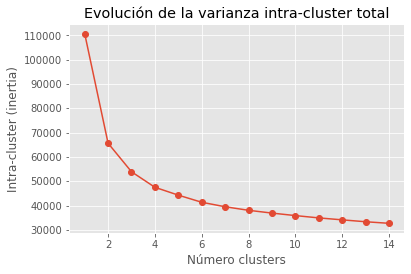

In [63]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(x_escalado)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

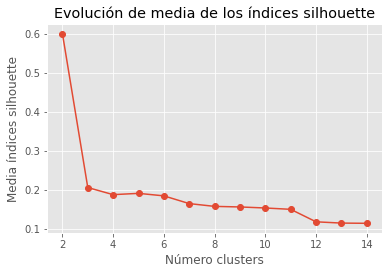

In [64]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(x_escalado)
    silhouette_avg = silhouette_score(x_escalado, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [65]:
from sklearn.cluster import KMeans 

clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=5)
k_means.fit(x_escalado)
labels = k_means.labels_
print(labels)


[1 4 3 ... 3 3 1]


In [66]:

df_final["Clus5_km"] = labels
df_final.head(5)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time,Clus5_km
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,69.0,6.0,11.0,10.0,8.0,8.0,2016,02,18 00:00:00,1
5,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2016-04-21 00:00:00,74.0,76.0,left,high,medium,...,78.0,14.0,7.0,9.0,9.0,12.0,2016,04,21 00:00:00,4
38,Aaron Doran,1991-05-13 00:00:00,170.18,163,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,...,24.0,16.0,11.0,12.0,9.0,13.0,2016,01,07 00:00:00,3
64,Aaron Galindo,1982-05-08 00:00:00,182.88,198,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,...,68.0,15.0,12.0,13.0,12.0,11.0,2016,04,21 00:00:00,1
112,Aaron Hunt,1986-09-04 00:00:00,182.88,161,2016-04-28 00:00:00,77.0,77.0,left,medium,medium,...,35.0,15.0,12.0,7.0,16.0,15.0,2016,04,28 00:00:00,4


In [67]:
# Tres Cluster

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=3)
k_means.fit(x_escalado)
labels = k_means.labels_
#print(labels)


df_final["Clus3_km"] = labels
df_final.head(5)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time,Clus5_km,Clus3_km
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,6.0,11.0,10.0,8.0,8.0,2016,02,18 00:00:00,1,0
5,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2016-04-21 00:00:00,74.0,76.0,left,high,medium,...,14.0,7.0,9.0,9.0,12.0,2016,04,21 00:00:00,4,2
38,Aaron Doran,1991-05-13 00:00:00,170.18,163,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,...,16.0,11.0,12.0,9.0,13.0,2016,01,07 00:00:00,3,2
64,Aaron Galindo,1982-05-08 00:00:00,182.88,198,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,...,15.0,12.0,13.0,12.0,11.0,2016,04,21 00:00:00,1,0
112,Aaron Hunt,1986-09-04 00:00:00,182.88,161,2016-04-28 00:00:00,77.0,77.0,left,medium,medium,...,15.0,12.0,7.0,16.0,15.0,2016,04,28 00:00:00,4,2


In [68]:
df_final.groupby('Clus3_km').mean()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Clus5_km
Clus3_km,,,,,,,,,,,,,,,,,,,,,
0,185.221492,175.499556,68.735790,71.525311,51.136767,42.702043,67.103908,63.019538,42.873002,55.284636,...,50.691385,60.387211,63.863677,61.008437,10.744671,10.602575,10.713144,10.760213,10.685169,1.952487
1,189.113975,184.234568,69.856790,72.093827,14.116049,13.466667,14.400000,28.145679,14.254321,14.437037,...,21.874074,13.587654,13.809877,13.945679,71.967901,67.422222,65.629630,69.086420,73.353086,0.000000
2,178.202027,159.485248,71.006942,74.328011,65.859771,61.370010,56.757723,70.000694,59.715377,71.575842,...,61.629642,43.191253,48.042346,45.424852,10.633461,10.688303,10.670600,10.645609,10.574106,3.235682


In [69]:
df_final.groupby('Clus5_km').mean()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Clus3_km
Clus5_km,,,,,,,,,,,,,,,,,,,,,
0,189.113975,184.234568,69.856790,72.093827,14.116049,13.466667,14.400000,28.145679,14.254321,14.437037,...,21.874074,13.587654,13.809877,13.945679,71.967901,67.422222,65.629630,69.086420,73.353086,1.000000
1,185.700467,175.479005,67.277605,70.416019,46.923017,33.648523,65.975894,60.218507,35.065319,49.314930,...,44.632970,66.309487,69.339036,66.458787,10.770607,10.531882,10.738725,10.857698,10.743390,0.000000
2,184.557176,176.138677,70.016539,72.676845,53.736641,70.958015,69.540712,63.660305,65.473282,67.639949,...,67.222646,23.676845,28.645038,24.844784,10.689567,10.767176,10.557252,10.561069,10.561069,1.081425
3,176.426233,154.423717,68.346349,72.749096,63.944324,60.417209,49.945047,67.676790,57.727404,71.081706,...,60.286334,35.475054,40.058568,37.473608,10.813449,10.738250,10.710774,10.620390,10.665944,1.955170
4,180.362706,165.091180,73.473778,75.639452,67.870679,53.855781,63.205602,73.013707,54.944577,69.023242,...,58.463051,64.052443,68.620381,66.412396,10.502980,10.615018,10.695471,10.697259,10.523838,1.315852


# Selección del equipo

In [70]:
#df_final.drop(borrar)
df_final[['player_name', 'weight', 'potential', 'crossing', 'finishing', 'heading_accuracy',
       'free_kick_accuracy', 'long_passing', 'sprint_speed', 'agility',
       'reactions', 'jumping', 'stamina', 'strength', 'aggression', 'marking',
       #'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       #'gk_reflexes', 
          'Clus3_km', 'Clus5_km']].groupby(['Clus5_km']).mean()

,weight,potential,crossing,finishing,heading_accuracy,free_kick_accuracy,long_passing,sprint_speed,agility,reactions,jumping,stamina,strength,aggression,marking,Clus3_km
Clus5_km,,,,,,,,,,,,,,,,
0,184.234568,72.093827,14.116049,13.466667,14.400000,14.313580,26.945679,43.891358,45.281481,66.876543,64.098765,33.116049,64.965432,29.286420,13.587654,1.000000
1,175.479005,70.416019,46.923017,33.648523,65.975894,38.094090,55.782271,59.958009,54.150078,62.743390,67.805599,65.402799,75.895801,70.382582,66.309487,0.000000
2,176.138677,72.676845,53.736641,70.958015,69.540712,50.796438,50.188295,71.225191,67.226463,68.013995,71.016539,67.128499,75.530534,60.592875,23.676845,1.081425
3,154.423717,72.749096,63.944324,60.417209,49.945047,58.242227,61.265365,74.577730,76.994215,64.971800,61.034707,66.373102,55.494577,52.149675,35.475054,1.955170
4,165.091180,75.639452,67.870679,53.855781,63.205602,58.331943,69.139452,71.948749,71.234803,72.406436,71.825387,77.595948,70.942193,73.035161,64.052443,1.315852


In [71]:
df_final[['height', 'player_name', 'weight', 'potential', 'crossing', 'finishing', 'heading_accuracy',
       'free_kick_accuracy', 'long_passing', 'sprint_speed', 'agility',
       'reactions', 'jumping', 'stamina', 'strength', 'aggression', 'marking',
       #'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       #'gk_reflexes', 
          'Clus3_km', 'Clus5_km']].groupby(['Clus5_km']).mean()

,height,weight,potential,crossing,finishing,heading_accuracy,free_kick_accuracy,long_passing,sprint_speed,agility,reactions,jumping,stamina,strength,aggression,marking,Clus3_km
Clus5_km,,,,,,,,,,,,,,,,,
0,189.113975,184.234568,72.093827,14.116049,13.466667,14.400000,14.313580,26.945679,43.891358,45.281481,66.876543,64.098765,33.116049,64.965432,29.286420,13.587654,1.000000
1,185.700467,175.479005,70.416019,46.923017,33.648523,65.975894,38.094090,55.782271,59.958009,54.150078,62.743390,67.805599,65.402799,75.895801,70.382582,66.309487,0.000000
2,184.557176,176.138677,72.676845,53.736641,70.958015,69.540712,50.796438,50.188295,71.225191,67.226463,68.013995,71.016539,67.128499,75.530534,60.592875,23.676845,1.081425
3,176.426233,154.423717,72.749096,63.944324,60.417209,49.945047,58.242227,61.265365,74.577730,76.994215,64.971800,61.034707,66.373102,55.494577,52.149675,35.475054,1.955170
4,180.362706,165.091180,75.639452,67.870679,53.855781,63.205602,58.331943,69.139452,71.948749,71.234803,72.406436,71.825387,77.595948,70.942193,73.035161,64.052443,1.315852


In [101]:
grupo_0 = ['reactions', 'jumping', 'strength']
grupo_2 = ['finishing', 'heading_accuracy', 'sprint_speed', 'agility', 'reactions', 'aggression']
grupo_3 = ['free_kick_accuracy', 'long_passing', 'sprint_speed', 'agility']
grupo_4 = ['crossing', 'free_kick_accuracy', 'long_passing', 'sprint_speed', 'reactions']

In [72]:
extra.columns

Index(['weight', 'potential', 'crossing', 'finishing', 'heading_accuracy',
       'free_kick_accuracy', 'long_passing', 'sprint_speed', 'agility',
       'reactions', 'jumping', 'stamina', 'strength', 'aggression', 'marking',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [73]:
df_final.columns

Index(['player_name', 'birthday', 'height', 'weight', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'year', 'month', 'day_time', 'Clus5_km', 'Clus3_km'],
      dtype='object')

### Seleccion de jugadores grupo 0

In [102]:
df_final[df_final['Clus5_km'] == 0].sort_values(by= grupo_0, ascending=False).head()


,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time,Clus5_km,Clus3_km
109033,Manuel Neuer,1986-03-27 00:00:00,193.04,203,2016-04-21 00:00:00,90.0,90.0,right,medium,medium,...,85.0,87.0,91.0,90.0,87.0,2016,04,21 00:00:00,0,1
142868,Petr Cech,1982-05-20 00:00:00,195.58,198,2016-01-28 00:00:00,86.0,86.0,left,medium,medium,...,83.0,84.0,77.0,85.0,85.0,2016,01,28 00:00:00,0,1
14442,Anthony Lopes,1990-10-01 00:00:00,182.88,179,2016-05-05 00:00:00,82.0,86.0,left,medium,medium,...,86.0,79.0,76.0,77.0,87.0,2016,05,05 00:00:00,0,1
156825,Samir Handanovic,1984-07-14 00:00:00,193.04,196,2016-04-14 00:00:00,84.0,84.0,right,medium,medium,...,87.0,80.0,70.0,87.0,87.0,2016,04,14 00:00:00,0,1
146296,Ralf Faehrmann,1988-09-27 00:00:00,195.58,209,2016-04-21 00:00:00,83.0,84.0,right,medium,medium,...,83.0,83.0,51.0,84.0,87.0,2016,04,21 00:00:00,0,1


In [105]:
df_final[(df_final['player_name'] =='Manuel Neuer') ][['player_name','birthday','height','preferred_foot','defensive_work_rate',
                                                       'reactions', 'jumping', 'strength',
                                                       'free_kick_accuracy', 'finishing',
                                                      'marking', 'standing_tackle']]


,player_name,birthday,height,preferred_foot,defensive_work_rate,reactions,jumping,strength,free_kick_accuracy,finishing,marking,standing_tackle
109033,Manuel Neuer,1986-03-27 00:00:00,193.04,right,medium,87.0,78.0,83.0,11.0,13.0,10.0,10.0


### Seleccion de jugadores grupo 1

In [98]:
df_final[df_final['Clus5_km'] == 1].sort_values(by=['strength', 'jumping',  'stamina','aggression','sprint_speed' ,'long_passing'], ascending=False).head()


,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time,Clus5_km,Clus3_km
30403,Christopher Samba,1984-03-28 00:00:00,193.04,220,2016-05-05 00:00:00,77.0,77.0,right,medium,high,...,14.0,11.0,7.0,9.0,8.0,2016,05,05 00:00:00,1,0
62579,George Elokobi,1986-01-31 00:00:00,180.34,212,2016-03-10 00:00:00,62.0,62.0,left,low,high,...,16.0,8.0,14.0,14.0,7.0,2016,03,10 00:00:00,1,0
525,Abdoul Ba,1994-02-08 00:00:00,200.66,212,2016-03-10 00:00:00,64.0,70.0,right,medium,medium,...,9.0,11.0,13.0,12.0,15.0,2016,03,10 00:00:00,1,0
129386,Mustapha Bayal Sall,1985-11-30 00:00:00,190.50,212,2016-02-18 00:00:00,78.0,78.0,right,medium,high,...,15.0,7.0,14.0,16.0,12.0,2016,02,18 00:00:00,1,0
77509,Jannik Vestergaard,1992-08-03 00:00:00,198.12,216,2016-04-28 00:00:00,77.0,82.0,left,medium,medium,...,16.0,11.0,11.0,15.0,10.0,2016,04,28 00:00:00,1,0


In [86]:
df_final[(df_final['player_name'] =='Christopher Samba') | (df_final['player_name'] =='George Elokobi')][['player_name','birthday','height','preferred_foot','defensive_work_rate','strength', 'jumping',  'stamina','aggression','sprint_speed' , 'long_passing']]

#df_final[(df_final['player_name'] =='Christopher Samba') | (df_final['player_name'] =='George Elokobi')][['player_name','birthday','height','preferred_foot','defensive_work_rate','strength', 'jumping',  'stamina','aggression','sprint_speed' , 'long_passing']]

,player_name,birthday,height,preferred_foot,defensive_work_rate,strength,jumping,stamina,aggression,sprint_speed,long_passing
30403,Christopher Samba,1984-03-28 00:00:00,193.04,right,high,96.0,31.0,55.0,88.0,30.0,52.0
62579,George Elokobi,1986-01-31 00:00:00,180.34,left,high,95.0,71.0,60.0,70.0,49.0,49.0


### Seleccion jugadores grupo 2

In [87]:
df_final[df_final['Clus5_km'] == 2].sort_values(by=grupo_2, ascending=False).head()

# 'player_name', 'weight', 'potential', 'crossing', 'finishing', 'heading_accuracy',
# 'free_kick_accuracy', 'long_passing', 'sprint_speed', 'agility',
# 'reactions', 'jumping', 'stamina', 'strength', 'aggression', 'marking

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time,Clus5_km,Clus3_km
65771,Gonzalo Higuain,1987-12-10 00:00:00,182.88,181,2016-05-05 00:00:00,86.0,86.0,right,high,medium,...,5.0,12.0,7.0,5.0,10.0,2016,05,05 00:00:00,2,2
78555,Javier Hernandez,1988-06-01 00:00:00,175.26,161,2016-01-28 00:00:00,82.0,82.0,right,medium,low,...,14.0,12.0,9.0,12.0,11.0,2016,01,28 00:00:00,2,2
43755,Diego Costa,1988-10-07 00:00:00,187.96,187,2016-04-21 00:00:00,85.0,86.0,right,high,medium,...,11.0,13.0,12.0,8.0,11.0,2016,04,21 00:00:00,2,2
120892,Mauro Icardi,1993-02-19 00:00:00,180.34,165,2016-05-12 00:00:00,80.0,85.0,right,medium,low,...,13.0,9.0,5.0,7.0,9.0,2016,05,12 00:00:00,2,2
25583,Carlos Bacca,1986-09-08 00:00:00,180.34,170,2016-05-05 00:00:00,82.0,82.0,right,medium,low,...,12.0,12.0,8.0,5.0,8.0,2016,05,05 00:00:00,2,2


In [92]:
df_final[(df_final['player_name'] =='Gonzalo Higuain') | 
         (df_final['player_name'] =='Javier Hernandez')][['player_name','birthday','height','preferred_foot','defensive_work_rate',
                                                         'finishing', 'heading_accuracy', 'sprint_speed', 'agility', 'reactions', 'aggression']]


,player_name,birthday,height,preferred_foot,defensive_work_rate,finishing,heading_accuracy,sprint_speed,agility,reactions,aggression
65771,Gonzalo Higuain,1987-12-10 00:00:00,182.88,right,medium,90.0,78.0,83.0,74.0,86.0,50.0
78555,Javier Hernandez,1988-06-01 00:00:00,175.26,right,low,89.0,82.0,85.0,79.0,81.0,59.0


### Seleccion jugadores grupo 3

In [83]:
df_final[df_final['Clus5_km'] == 3].sort_values(by=grupo_3, ascending=False).head()

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time,Clus5_km,Clus3_km
68319,Hakan Calhanoglu,1994-02-08 00:00:00,177.80,168,2016-04-28 00:00:00,79.0,84.0,right,medium,medium,...,9.0,14.0,11.0,6.0,10.0,2016,04,28 00:00:00,3,2
11974,Andrea Pirlo,1979-05-19 00:00:00,177.80,150,2016-06-09 00:00:00,81.0,81.0,right,low,low,...,5.0,4.0,1.0,5.0,2.0,2016,06,09 00:00:00,3,2
4502,Alban Meha,1986-04-26 00:00:00,175.26,168,2016-03-10 00:00:00,74.0,74.0,right,medium,medium,...,10.0,13.0,15.0,9.0,14.0,2016,03,10 00:00:00,3,2
29092,Christian Eriksen,1992-02-14 00:00:00,177.80,157,2016-03-10 00:00:00,83.0,87.0,right,high,medium,...,9.0,14.0,7.0,7.0,6.0,2016,03,10 00:00:00,3,2
46634,Duda,1980-06-27 00:00:00,175.26,157,2016-03-03 00:00:00,73.0,73.0,left,medium,high,...,14.0,12.0,10.0,6.0,14.0,2016,03,03 00:00:00,3,2


In [95]:
df_final[(df_final['player_name'] =='Hakan Calhanoglu') |
         (df_final['player_name'] =='Andrea Pirlo') |
         (df_final['player_name'] =='Alban Meha') |
         (df_final['player_name'] =='Christian Eriksen')][['player_name','birthday','height','preferred_foot','defensive_work_rate',
                                                           'free_kick_accuracy', 'long_passing', 'sprint_speed', 'agility']]


,player_name,birthday,height,preferred_foot,defensive_work_rate,free_kick_accuracy,long_passing,sprint_speed,agility
4502,Alban Meha,1986-04-26 00:00:00,175.26,right,medium,88.0,74.0,67.0,78.0
11974,Andrea Pirlo,1979-05-19 00:00:00,177.80,right,low,93.0,90.0,33.0,44.0
29092,Christian Eriksen,1992-02-14 00:00:00,177.80,right,medium,87.0,82.0,74.0,77.0
68319,Hakan Calhanoglu,1994-02-08 00:00:00,177.80,right,medium,94.0,77.0,73.0,76.0


### Seleccion jugadores grupo 4

In [84]:
df_final[df_final['Clus5_km'] == 4].sort_values(by=grupo_4, ascending=False).head(5)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day_time,Clus5_km,Clus3_km
148723,Ricardo Rodriguez,1992-08-25 00:00:00,180.34,170,2016-02-25 00:00:00,82.0,86.0,left,high,medium,...,14.0,13.0,14.0,14.0,11.0,2016,02,25 00:00:00,4,2
100475,Leighton Baines,1984-12-11 00:00:00,170.18,154,2016-04-07 00:00:00,82.0,82.0,left,high,medium,...,8.0,15.0,10.0,13.0,12.0,2016,04,07 00:00:00,4,2
5694,Aleksandar Kolarov,1985-11-10 00:00:00,187.96,183,2016-02-04 00:00:00,78.0,78.0,left,high,medium,...,16.0,15.0,8.0,16.0,6.0,2016,02,04 00:00:00,4,2
95257,Kevin de Bruyne,1991-06-28 00:00:00,180.34,168,2016-02-18 00:00:00,86.0,89.0,right,high,medium,...,15.0,13.0,5.0,10.0,13.0,2016,02,18 00:00:00,4,2
13738,Angel Di Maria,1988-02-14 00:00:00,180.34,165,2016-01-28 00:00:00,86.0,86.0,left,high,medium,...,10.0,7.0,11.0,12.0,11.0,2016,01,28 00:00:00,4,2


In [97]:
df_final[(df_final['player_name'] =='Ricardo Rodriguez') |
         (df_final['player_name'] =='Leighton Baines') |
         (df_final['player_name'] =='Aleksandar Kolarov')][['player_name','birthday','height','preferred_foot','defensive_work_rate',
                                                           'crossing', 'free_kick_accuracy', 'long_passing', 'sprint_speed', 'reactions']]


,player_name,birthday,height,preferred_foot,defensive_work_rate,crossing,free_kick_accuracy,long_passing,sprint_speed,reactions
5694,Aleksandar Kolarov,1985-11-10 00:00:00,187.96,left,medium,90.0,81.0,77.0,66.0,79.0
100475,Leighton Baines,1984-12-11 00:00:00,170.18,left,medium,91.0,82.0,74.0,75.0,80.0
148723,Ricardo Rodriguez,1992-08-25 00:00:00,180.34,left,medium,92.0,84.0,78.0,76.0,85.0
